<a href="https://colab.research.google.com/github/PacTal/Physics/blob/main/Espectro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autor: Paco H. Talero L.

# Análisis la intensidad en función de la longitud de onda para la imagen de un espectro electromagnético

Tome esta imagen como referencia: tomada de [Referencia en web](https://espanol.libretexts.org/Quimica/Qu%C3%ADmica_General/Mapa%3A_Qu%C3%ADmica_-_La_naturaleza_molecular_de_la_materia_y_el_cambio_%28Silberberg%29/07%3A_Teor%C3%ADa_cu%C3%A1ntica_y_estructura_at%C3%B3mica/7.02%3A_Espectros_at%C3%B3micos)

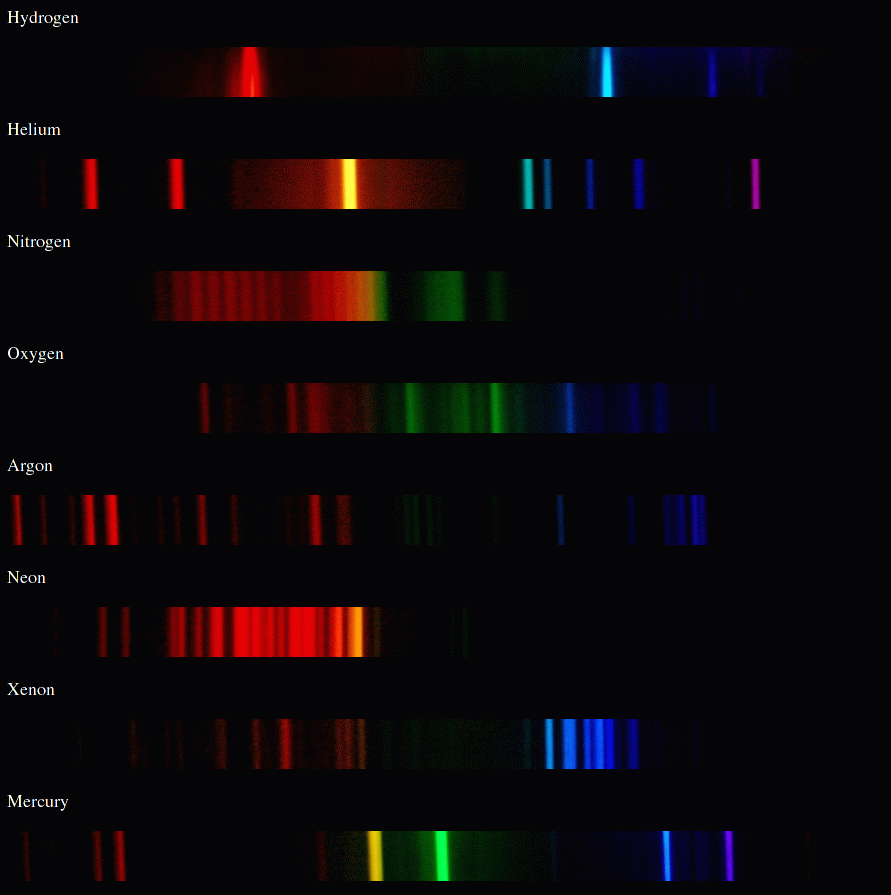

In [ ]:
# Importar bibliotecas necesarias
import cv2  # OpenCV: Biblioteca para procesamiento de imágenes y visión por computadora.
import numpy as np  # NumPy: Biblioteca fundamental para el manejo de matrices y operaciones numéricas.
import matplotlib.pyplot as plt  # Matplotlib: Biblioteca para la creación de gráficos y visualización de datos en Python.
from google.colab import files  # Google Colab files: Herramienta para cargar y manipular archivos en Google Colab.

Sube tu imagen del espectro:


Saving Helium.png to Helium (19).png


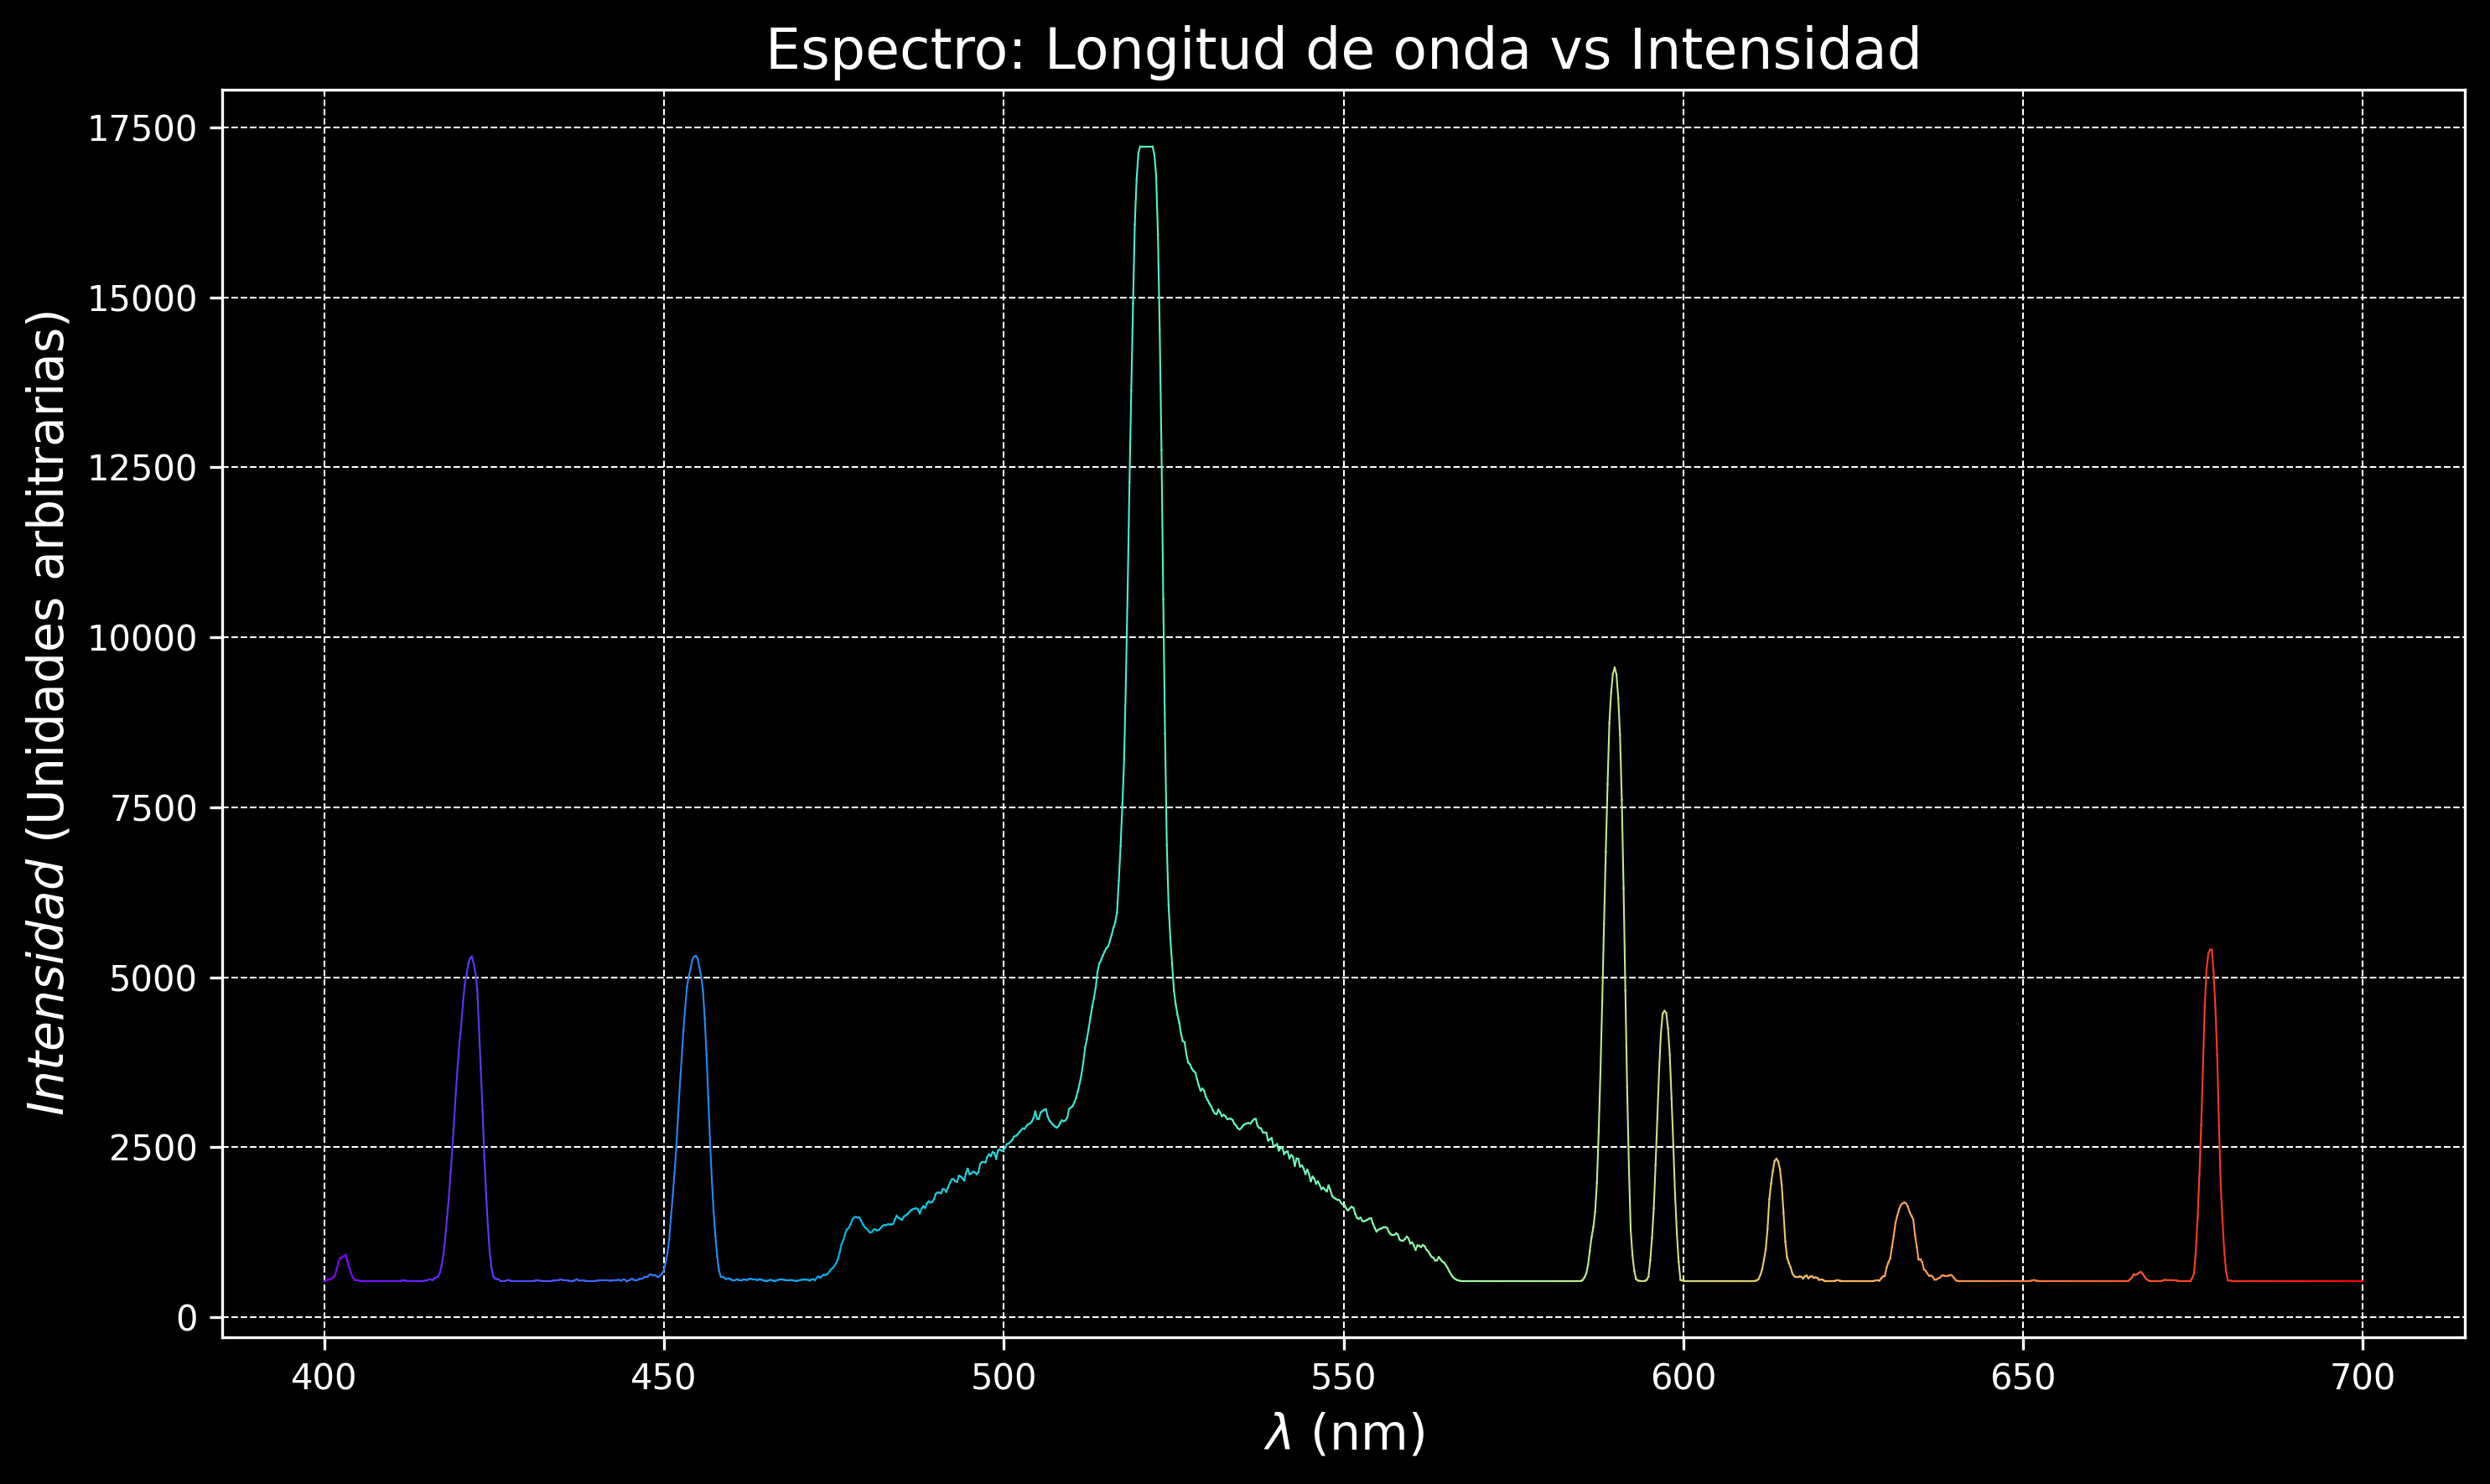

In [ ]:
# Función para procesar la imagen del espectro
def procesar_espectro(imagen_path, rango_longitud_onda=(400, 700)):
    # Leer la imagen en escala de grises
    # La imagen en escala de grises representa la intensidad de la luz en cada longitud de onda.
    imagen = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)

    if imagen is None:
        print("No se pudo cargar la imagen. Verifica la ruta.")
        return

    # Sumar intensidades por columnas
    # Cada columna representa una longitud de onda específica, y la suma de las intensidades por columna
    # da la intensidad total de luz a lo largo de esa longitud de onda.
    intensidad_columnas = np.sum(imagen, axis=0)

    # Normalizar las longitudes de onda al rango especificado
    num_columnas = imagen.shape[1]
    longitudes_onda = np.linspace(rango_longitud_onda[0], rango_longitud_onda[1], num_columnas)

    # Crear un colormap para representar colores de acuerdo con la longitud de onda
    cmap = plt.get_cmap('rainbow')  # 'rainbow' va de rojo (longitudes de onda largas) a violeta (corto)

    # Configuración del fondo oscuro
    plt.style.use('dark_background')  # Usamos un fondo oscuro para mejorar el contraste de las líneas

    # Graficar los datos con un color gradiente
    plt.figure(figsize=(10, 6), dpi=300)  # Aumentar la resolución a 300 dpi
    for i in range(num_columnas - 1):
        # Cada segmento de la gráfica tiene un color del colormap según la longitud de onda.
        plt.plot(longitudes_onda[i:i+2], intensidad_columnas[i:i+2], color=cmap((longitudes_onda[i] - rango_longitud_onda[0]) / (rango_longitud_onda[1] - rango_longitud_onda[0])), linewidth=0.5)  # Líneas delgadas

    # Añadir etiquetas y título
    # En el fondo oscuro, el texto necesita ser blanco para mayor visibilidad.
    plt.xlabel(r'$\lambda$ (nm)', fontsize=14, color='white')  # Etiqueta en blanco para resaltar sobre el fondo oscuro
    plt.ylabel('$Intensidad$ (Unidades arbitrarias)', fontsize=14, color='white')  # Etiqueta en blanco
    plt.title('Espectro: Longitud de onda vs Intensidad', fontsize=16, color='white')  # Título en blanco

    # Mostrar leyenda, cuadrícula y gráfico
    plt.grid(True, linestyle='--', linewidth=0.5, color='white')  # Cuadrícula con líneas blancas para resaltar
    plt.tight_layout()  # Ajuste automático de los elementos del gráfico
    plt.show()  # Mostrar la gráfica final

# Subir la imagen desde el dispositivo
print("Sube tu imagen del espectro:")
uploaded = files.upload()

# Procesar la primera imagen subida
imagen_path = next(iter(uploaded))  # Toma el nombre del archivo cargado
procesar_espectro(imagen_path)  # Llama a la función que procesa la imagen y genera el gráfico
